### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [73]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
# Lets read the data from a csv file

data = pd.read_csv('data/coupons.csv')

In [3]:
# Lets print the first 5 rows of the data frame

data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# Lets find the row and column count in the data frame

data.shape

(12684, 26)

In [5]:
# Lets find the column details of the data frame such as data type, non null count

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data['income'].unique()

array(['$37500 - $49999', '$62500 - $74999', '$12500 - $24999',
       '$75000 - $87499', '$50000 - $62499', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [7]:
# Lets find the 'total' null value count

data.isnull().sum().sum()

13370

In [8]:
# Lets find the null value counts for all the columns in a simple way

data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<B> @Finding </B>

From above, we can find a total of 6 colums containing null values and of which 'car' column has the most number of null values

In [9]:
# Following command calculates some statistical data like percentile, mean and std of the numerical values of the DataFrame

data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

## Fill & replace null values

The primary column to fix 0 with appropriate value is 'car'.

In [10]:
# Lets find all the unique values in column 'car' to understand better

data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [11]:
# Create a new data frame by making a copy

df = data

In [12]:
# Fill the null values in 'car'column as 'no'

df['car']=df['car'].fillna(value='no')

In [13]:
# Fill the remaining non null values in 'car'column as 'yes' & 'no' as appropriate

df = df.replace({'car' : {'Scooter and motorcycle' : 'yes', 'crossover' : 'yes', 'Mazda5' : 'yes',
                          'do not drive' : 'no', 'Car that is too old to install Onstar :D' : 'no'}})

In [14]:
# Let's check how many unique values exist now

df['car'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
# Lets find the 'total' null value count in df

df.isnull().sum().sum()

794

## Drop null values

In [16]:
# Drop the remaining negligible count of null values

df = df.dropna()

In [17]:
# Lets find the 'total' null value count in df, again

df.isnull().sum().sum()

0

4. What proportion of the total observations chose to accept the coupon? 

In [18]:
# Lets first calculate the coupon accepted count

coupon_accepted = df['Y'].value_counts()[1]

# Lets calculate the total coupon offered count

total_coupon_offered = df['Y'].count()

# Lets calculate the proportion of coupon acceptance from above values

proportion_of_coupon_acceptance = round((coupon_accepted/total_coupon_offered)*100,2)

proportion_of_coupon_acceptance

56.93

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Type by Count')

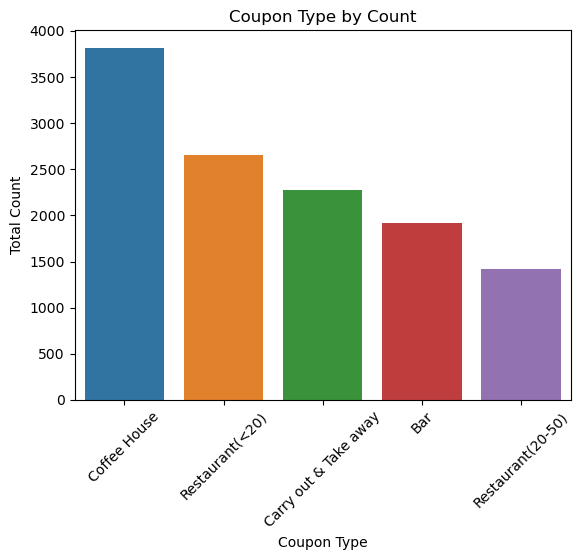

In [19]:
# Below bar plot shows the coupon column with all its unique values with count

g1 = sns.barplot(x=df.coupon.value_counts().index, y=df.coupon.value_counts())
g1.tick_params(axis='x', rotation=45)
g1.set(xlabel='Coupon Type', ylabel='Total Count')
g1.set_title('Coupon Type by Count')

Text(0.5, 1.0, 'Coupon Type by Count')

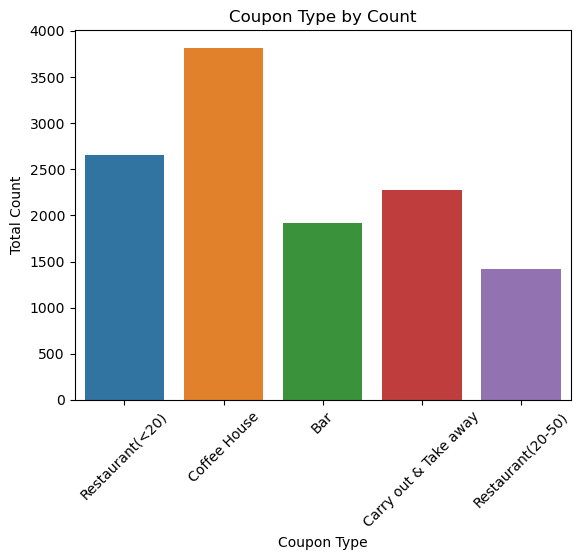

In [20]:
# Below is the same equivalent of above but done using count plot

g2 = sns.countplot(data = df, x='coupon')
g2.tick_params(axis='x', rotation=45)
g2.set(xlabel='Coupon Type', ylabel='Total Count')
g2.set_title('Coupon Type by Count')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Histogram')

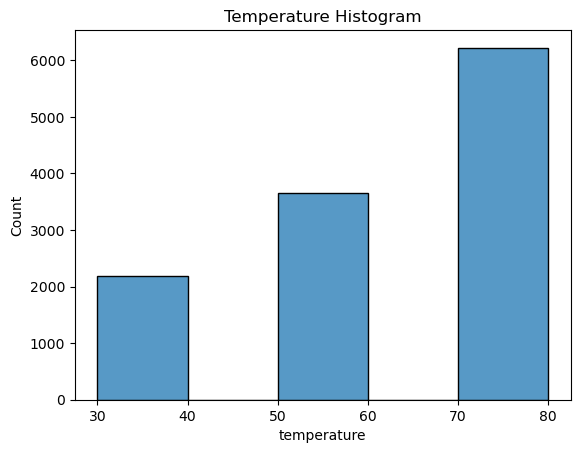

In [21]:
g3 = sns.histplot(data=df, x='temperature', binwidth=10)
g3.set_title('Temperature Histogram')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [22]:
# Let's first find the unique values of 'coupon' column to see all the available choices

df['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

In [23]:
# Let's create a new dataframe that is filtered for bar coupon only

df_bar_coupons = df.query("coupon == 'Bar'")

In [24]:
# Let's take a quick sample by picking top 5 records to check if the coupons are filtered for bar

df_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


In [25]:
# Let's also check the size of the new filtered dataframe, in terms of rows and columns

df_bar_coupons.shape

(1913, 26)

2. What proportion of bar coupons were accepted?


In [26]:
# Lets first calculate the bar coupon accepted count

bar_coupon_accepted = df_bar_coupons['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count

total_bar_coupon_offered = df_bar_coupons['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values

proportion_of_bar_coupon_acceptance = round((bar_coupon_accepted/total_bar_coupon_offered)*100,2)

proportion_of_bar_coupon_acceptance

41.19

In [27]:
# Lets first calculate the bar coupon not accepted count

bar_coupon_not_accepted = df_bar_coupons['Y'].value_counts()[0]

# Lets calculate the total bar coupon offered count

total_bar_coupon_offered = df_bar_coupons['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values

proportion_of_bar_coupon_not_accepted = round((bar_coupon_not_accepted/total_bar_coupon_offered)*100,2)

proportion_of_bar_coupon_not_accepted

58.81

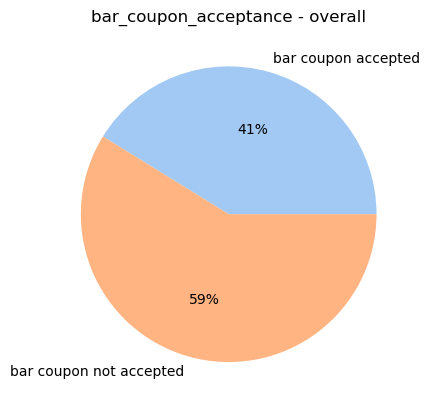

In [28]:
#define data
data = [proportion_of_bar_coupon_acceptance, proportion_of_bar_coupon_not_accepted]
labels = ['bar coupon accepted', 'bar coupon not accepted']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - overall')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [29]:
# Let's find all the unique values for the Bar column

df_bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [30]:
# Let's create a simple list to keep only more frequent entries

more_frequent = ['gt8', '4~8']

# Now, use the list and create a new column with condition based

df_bar_coupons['Bar_More_Frequent'] = np.where(df_bar_coupons['Bar'].isin(['gt8', '4~8']), 1, 0)

# Now, validate where the new column is present and the value counts are as expected

df_bar_coupons['Bar_More_Frequent'].value_counts()

# This column now simply says whether a person is a frequent visitor to the bar or not

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/3216670899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons['Bar_More_Frequent'] = np.where(df_bar_coupons['Bar'].isin(['gt8', '4~8']), 1, 0)


0    1720
1     193
Name: Bar_More_Frequent, dtype: int64

In [31]:
# Total who went to bar frequently = 193
# Total who did not go to bar frequently = 1720

In [32]:
# Lets first calculate the bar coupon accepted count for frequent visitors

bar_coupon_accepted_more_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors

total_bar_coupon_offered_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors

proportion_of_bar_coupon_acceptance_frequent_visitors = round((bar_coupon_accepted_more_frequent_visitors/total_bar_coupon_offered_frequent_visitors)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors

76.17

In [33]:
# Lets first calculate the bar coupon accepted count for less frequent visitors

bar_coupon_accepted_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent visitors

total_bar_coupon_offered_less_frequent_visitors = df_bar_coupons.query("Bar_More_Frequent == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent visitors

proportion_of_bar_coupon_acceptance_less_frequent_visitors = round((bar_coupon_accepted_less_frequent_visitors/total_bar_coupon_offered_less_frequent_visitors)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors

37.27

<B> @Finding </B>

From above, we can find the 'frequent visitors' to bar have accepted the coupons to the most (76%) compared to 'less frequent visitors' who have showed only less interest (37%)

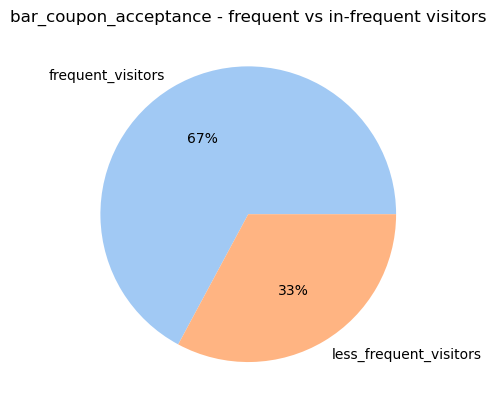

In [34]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors, proportion_of_bar_coupon_acceptance_less_frequent_visitors]
labels = ['frequent_visitors', 'less_frequent_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent vs in-frequent visitors')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [35]:
# Let's create a function that checks for both the conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['46', '26', '31', '41', '50plus', '36']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/2058818700.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons['Bar_Frequent_Age'] = df_bar_coupons.apply(conditions, axis=1)


In [36]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age']].sample(10)

,Bar,age,Bar_Frequent_Age
4086,1~3,21,0
12349,less1,31,0
4136,never,26,0
6748,1~3,21,0
7577,never,below21,0
2024,less1,50plus,0
11065,never,36,0
4962,less1,21,0
3813,never,21,0
9697,less1,41,0


In [37]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age

bar_coupon_accepted_more_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age

total_bar_coupon_offered_frequent_visitors_elder_age = df_bar_coupons.query("Bar_Frequent_Age == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age = round((bar_coupon_accepted_more_frequent_visitors_elder_age/total_bar_coupon_offered_frequent_visitors_elder_age)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age

68.98

In [38]:
# Lets first calculate the bar coupon accepted count for less frequent vistors with younger age

bar_coupon_accepted_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent vistors with younger age

total_bar_coupon_offered_less_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent vistors with younger age

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age = round((bar_coupon_accepted_less_frequent_visitors_younger_age/total_bar_coupon_offered_less_frequent_visitors_younger_age)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age

33.77

<B> @Finding </B>

From above, we can find the 'frequent elderly visitors' to bar have accepted the coupons to the most (69%) compared to 'less frequent young visitors' who have showed only less interest (33%)

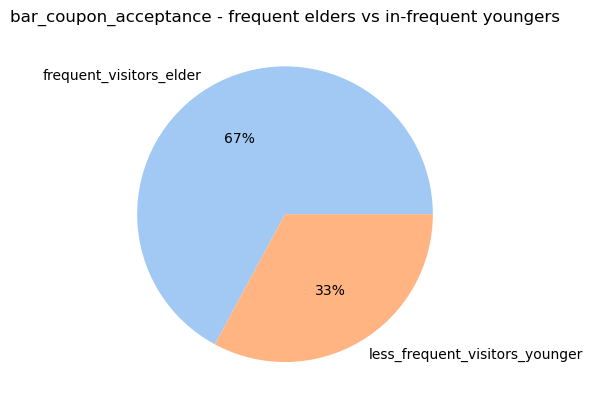

In [39]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age, proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age]
labels = ['frequent_visitors_elder', 'less_frequent_visitors_younger']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders vs in-frequent youngers')
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [40]:
df_bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [41]:
df_bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [42]:
# Let's create a function that checks for all 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['occupation'] not in ['Farming Fishing & Forestry']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Job'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/151662364.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons['Bar_Frequent_Age_Job'] = df_bar_coupons.apply(conditions, axis=1)


In [43]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','occupation','Bar_Frequent_Age_Job']].sample(10)

,Bar,age,occupation,Bar_Frequent_Age_Job
10477,1~3,31,Student,1
8525,1~3,21,Student,1
4742,never,50plus,Retired,0
7630,never,50plus,Transportation & Material Moving,0
8321,less1,41,Computer & Mathematical,0
11323,never,50plus,Food Preparation & Serving Related,0
3230,never,31,Healthcare Support,0
12525,1~3,21,Food Preparation & Serving Related,1
10074,never,50plus,Unemployed,0
1888,less1,21,Student,0


In [44]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age and not farming/fishing job

bar_coupon_accepted_more_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age and not farming/fishing job

total_bar_coupon_offered_frequent_visitors_elder_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age and not farming/fishing job

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job = round((bar_coupon_accepted_more_frequent_visitors_elder_age_job/total_bar_coupon_offered_frequent_visitors_elder_age_job)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job

69.04

In [45]:
# Lets first calculate the bar coupon accepted count for less frequent vistors with younger age and specific job

bar_coupon_accepted_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for less frequent vistors with younger age and specific job

total_bar_coupon_offered_less_frequent_visitors_younger_age_job = df_bar_coupons.query("Bar_Frequent_Age_Job == 0")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for less frequent vistors with younger age and specific job

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job = round((bar_coupon_accepted_less_frequent_visitors_younger_age_job/total_bar_coupon_offered_less_frequent_visitors_younger_age_job)*100,2)

proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job

29.61

<B> @Finding </B>

From above, we can find the 'frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the most (70%) compared to 'less frequent young visitors with farming/fishing/forestry job' who have showed only less interest (30%)

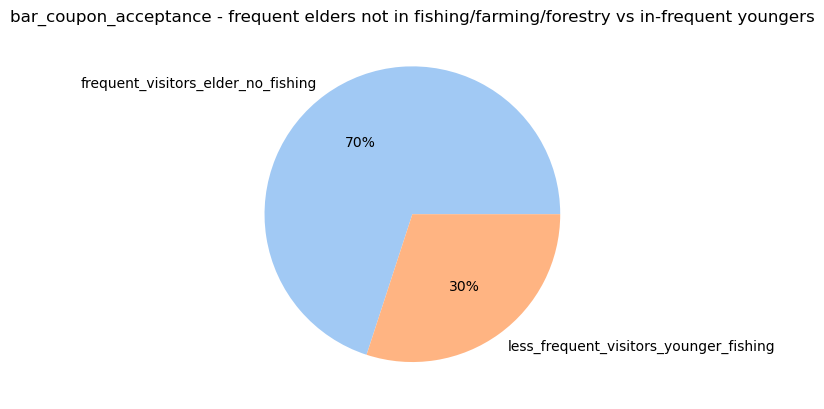

In [46]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_job, proportion_of_bar_coupon_acceptance_less_frequent_visitors_younger_age_job]
labels = ['frequent_visitors_elder_no_fishing', 'less_frequent_visitors_younger_fishing']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders not in fishing/farming/forestry vs in-frequent youngers')
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [47]:
df_bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [48]:
# Let's create a function that checks for all first 3 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['21','46', '26', '31', '41', '50plus', '36'] and s['maritalStatus'] not in ['Widowed']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_Marital'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/3270510010.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons['Bar_Frequent_Age_Marital'] = df_bar_coupons.apply(conditions, axis=1)


In [49]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','maritalStatus','Bar_Frequent_Age_Marital']].sample(10)

,Bar,age,maritalStatus,Bar_Frequent_Age_Marital
1760,never,26,Single,0
11520,never,below21,Single,0
10372,1~3,26,Unmarried partner,1
10846,1~3,21,Single,1
3699,never,26,Unmarried partner,0
7241,1~3,50plus,Married partner,1
12566,never,26,Married partner,0
8548,never,36,Unmarried partner,0
4020,1~3,31,Married partner,1
9590,never,31,Unmarried partner,0


In [50]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with elderly age and not widowed

bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with elderly age and not widowed

total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed = df_bar_coupons.query("Bar_Frequent_Age_Marital == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with elderly age and not widowed

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed = round((bar_coupon_accepted_more_frequent_visitors_elder_age_not_widowed/total_bar_coupon_offered_frequent_visitors_elder_age_not_widowed)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed

69.04

In [51]:
# Let's create a function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['Bar'] in ['1~3', 'gt8', '4~8'] and s['age'] in ['below21', '21', '26']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_Frequent_Age_30'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/2519260336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons['Bar_Frequent_Age_30'] = df_bar_coupons.apply(conditions, axis=1)


In [52]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['Bar','age','Bar_Frequent_Age_30']].sample(10)

,Bar,age,Bar_Frequent_Age_30
1679,never,46,0
465,gt8,31,0
2288,less1,41,0
3912,never,26,0
8768,1~3,50plus,0
5861,less1,26,0
8896,less1,26,0
7601,never,36,0
12046,less1,46,0
12054,less1,46,0


In [53]:
# Lets first calculate the bar coupon accepted count for high frequent vistors with younger age

bar_coupon_accepted_more_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for frequent visitors with younger age

total_bar_coupon_offered_frequent_visitors_younger_age = df_bar_coupons.query("Bar_Frequent_Age_30 == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for frequent visitors with younger age

proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age = round((bar_coupon_accepted_more_frequent_visitors_younger_age/total_bar_coupon_offered_frequent_visitors_younger_age)*100,2)

proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age

71.95

In [54]:
df_bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [55]:
df_bar_coupons['income'].unique()

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [56]:
# Let's create a function that checks for all second 2 conditions and return 1 or 0

def conditions(s):
    if s['RestaurantLessThan20'] in ['4~8', 'gt8'] and s['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']:
        return 1
    else:
        return 0
    
# Let's create a new column based on the function above

df_bar_coupons['Bar_cheap_restaurant_low_income'] = df_bar_coupons.apply(conditions, axis=1)

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/444200296.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar_coupons['Bar_cheap_restaurant_low_income'] = df_bar_coupons.apply(conditions, axis=1)


In [57]:
# Let's validate the outcome whether it works based on the conditions applied

df_bar_coupons[['RestaurantLessThan20','income','Bar_cheap_restaurant_low_income']].sample(10)

,RestaurantLessThan20,income,Bar_cheap_restaurant_low_income
3072,gt8,$37500 - $49999,1
2486,4~8,$75000 - $87499,0
9742,less1,$87500 - $99999,0
8044,less1,$12500 - $24999,0
3747,less1,$25000 - $37499,0
11349,1~3,Less than $12500,0
11539,gt8,Less than $12500,1
11170,gt8,$37500 - $49999,1
11062,less1,Less than $12500,0
8818,1~3,$100000 or More,0


In [58]:
# Lets first calculate the bar coupon accepted count for cheap restaurant visitor with low income

bar_coupon_accepted_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].value_counts()[1]

# Lets calculate the total bar coupon offered count for cheap restaurant visitor with low income

total_bar_coupon_offered_cheap_restaurant_low_income = df_bar_coupons.query("Bar_cheap_restaurant_low_income == 1")['Y'].count()

# Lets calculate the proportion of bar coupon acceptance from above values for cheap restaurant visitor with low income

proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income = round((bar_coupon_accepted_cheap_restaurant_low_income/total_bar_coupon_offered_cheap_restaurant_low_income)*100,2)

proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income

45.65

<B> @Finding </B>

From above, we can find the 'frequent younger visitors' to bar have accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%)

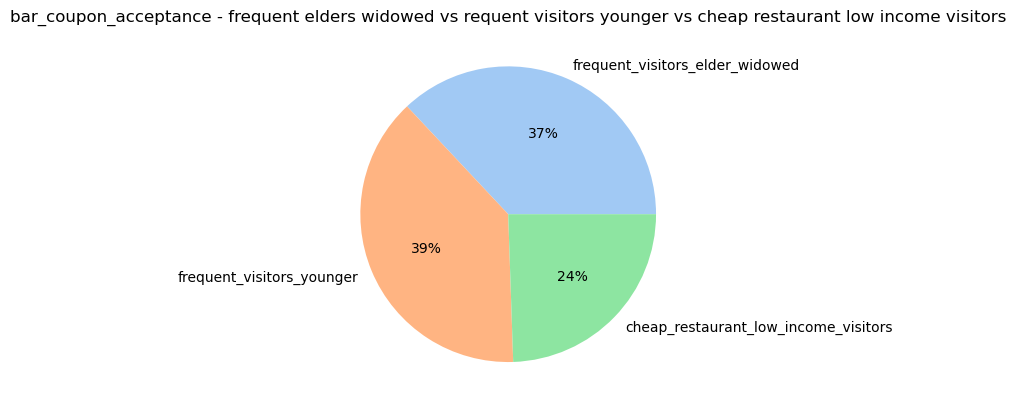

In [59]:
#define data
data = [proportion_of_bar_coupon_acceptance_frequent_visitors_elderly_age_not_widowed, proportion_of_bar_coupon_acceptance_frequent_visitors_younger_age, proportion_of_bar_coupon_acceptance_cheap_restaurant_low_income]
labels = ['frequent_visitors_elder_widowed', 'frequent_visitors_younger', 'cheap_restaurant_low_income_visitors']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:3]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('bar_coupon_acceptance - frequent elders widowed vs requent visitors younger vs cheap restaurant low income visitors')
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The 'more frequent visitors' to bar have accepted the coupons to the most (~76%) compared to the 'less frequent visitors' who have showed only less interest in coupon acceptance (~37%).

The 'frequent elderly visitors' to bar have accepted the coupons to the most (69%) compared to 'less frequent young visitors' who have showed only less interest (33%).

The 'frequent elderly visitors without farming/fishing/forestry job' to bar have accepted the coupons to the most (70%) compared to 'less frequent young visitors with farming/fishing/forestry job' who have showed only less interest (30%).

The 'frequent younger visitors' to bar have accepted the coupons to the most (39%) compared to 'frequent visitors that are elder and widowed' who have slightly less interest (37%) or 'frequent visitors to cheap restaurants with low income' who have even less interest (24%).

In general, those drivers, who has the habit of going to bar more frequently are taking advantage of the coupon and acceoting the same more compared to anyone else.

Drivers who are within low income or use cheap restaurants does not much care about the bar coupons and that was evident from the outcomes.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Let's focus on the coffee house coupons

In [60]:
# Let's create a new dataframe that is filtered for coffee house coupon only

df_coffee_coupons = df.query("coupon == 'Coffee House'")

In [61]:
# Let's take a look at the top 5 rows for coffee house data frame

df_coffee_coupons.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [62]:
# Let's find the number of rows and columns available

df_coffee_coupons.shape

(3816, 26)

In [63]:
# Lets first calculate the coffee house coupon accepted count

coffee_coupon_accepted = df_coffee_coupons['Y'].value_counts()[1]

# Lets calculate the total coffee house coupon offered count

total_coffee_coupon_offered = df_coffee_coupons['Y'].count()

# Lets calculate the proportion of coffee coupon acceptance from above values

proportion_of_coffee_coupon_acceptance = round((coffee_coupon_accepted/total_coffee_coupon_offered)*100,2)

proportion_of_coffee_coupon_acceptance

49.63

In [64]:
# Let's check the column data types once

df_coffee_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3816 entries, 23 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3816 non-null   object
 1   passanger             3816 non-null   object
 2   weather               3816 non-null   object
 3   temperature           3816 non-null   int64 
 4   time                  3816 non-null   object
 5   coupon                3816 non-null   object
 6   expiration            3816 non-null   object
 7   gender                3816 non-null   object
 8   age                   3816 non-null   object
 9   maritalStatus         3816 non-null   object
 10  has_children          3816 non-null   int64 
 11  education             3816 non-null   object
 12  occupation            3816 non-null   object
 13  income                3816 non-null   object
 14  car                   3816 non-null   object
 15  Bar                   3816 non-null 

In [65]:
# Let's make a copy of the numeric column for acceptance and then convert into string for better use in charts

df_coffee_coupons['acceptance'] = df_coffee_coupons['Y']

df_coffee_coupons['acceptance']=df_coffee_coupons['acceptance'].astype("string")

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/2236306370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_coupons['acceptance'] = df_coffee_coupons['Y']
/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/2236306370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_coupons['acceptance']=df_coffee_coupons['acceptance'].astype("string")


In [66]:
# Let's validate if the column has been created with appropriate data type

print(df_coffee_coupons.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
acceptance              string
dtype: object


In [67]:
# For better readbaility, lets replace the value 1 as 'Accepted' & 0 as 'Not Accepted'

df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('1', 'Accepted')
df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('0', 'Not Accepted')

/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/615226601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('1', 'Accepted')
/var/folders/nz/d7kkf8rd7dn_h3ns03thccnw0000gn/T/ipykernel_1401/615226601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_coupons['acceptance'] = df_coffee_coupons['acceptance'].str.replace('0', 'Not Accepted')


In [68]:
# Validate if the replaced values are showing up

df_coffee_coupons['acceptance'].unique()

<StringArray>
['Not Accepted', 'Accepted']
Length: 2, dtype: string

## Distribution of Coffee coupon acceptance

Text(0.5, 1.0, 'Distribution of Accepted Coffee Coupons')

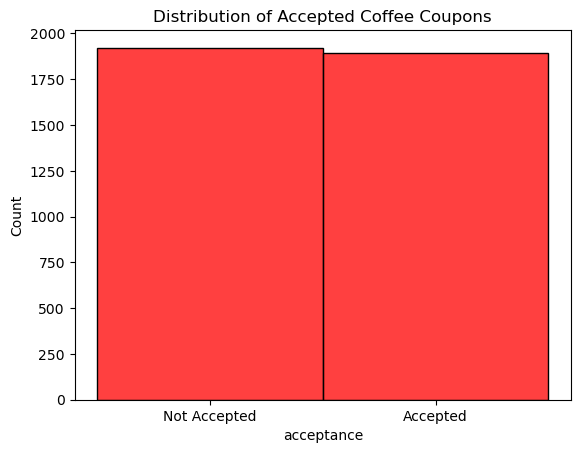

In [69]:
# Lets create a histogram based on the coffee coupon acceptance overall

g1 = sns.histplot(data=df_coffee_coupons, x='acceptance', color='red')
g1.set_title('Distribution of Accepted Coffee Coupons')

In [72]:
df_coffee_coupons['passanger'].unique()

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [104]:
# Lets create a barplot based on the coffee coupon acceptance, by passengers 

fig = px.bar(df_coffee_coupons['passanger'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Passanger Type',
            labels={'value':'Passanger Type',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

Coffee coupons were accepted comparatively more by the passanger with friends group whereas comparatively less when travelling alone.

In [103]:
# Lets create a barplot based on the coffee coupon acceptance, by income 

fig = px.bar(df_coffee_coupons['income'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Income',
            labels={'value':'Income',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

Income does not influence much when it comes to coffee coupon acceptance and it mostly shows around 50% acceptance on all income groups.

In [102]:
# Lets create a barplot based on the coffee coupon acceptance, by gender 

fig = px.bar(df_coffee_coupons['gender'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Gender',
            labels={'value':'Gender',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

Gender does not influence much either when it comes to coffee coupon acceptance and it mostly shows around 50% acceptance for both male and female.

In [99]:
# Lets create a barplot based on the coffee coupon acceptance, by age 

fig = px.bar(df_coffee_coupons['age'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Age',
            labels={'value':'Age',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )

fig.show()

@Finding

It is interesting to notice the young drivers with age below 21 has higher acceptance for coffee coupons, whereas elderly population with 50 plus shows slightly less acceptance but all other intermediate groups show around 50% acceptance. 

In [100]:
# Lets create a barplot based on the coffee coupon acceptance, by occupation 

fig = px.bar(df_coffee_coupons['occupation'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Occupation',
            labels={'value':'Occupation',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

There is wide acceptance of coffee coupon from students, unemployed folks. Drivers belong to 'building/grounds cleaning/maintenance' have close to 100% acceptance, similar case for 'farmiing/fishing/forestry' & 'healthcare' jobs as well. 'Sales' job folks show comparatively less interest on coffee coupons.

In [101]:
# Lets create a barplot based on the coffee coupon acceptance, by weather 

fig = px.bar(df_coffee_coupons['weather'], color=df_coffee_coupons['acceptance'], 
             title = 'Coffee Coupon Acceptance by Weather',
            labels={'value':'Weather',
                   'count':'Total Acceptance'}
            )

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    tickangle = 45,
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)

fig.update_traces(marker_line_width = 0,
                  selector=dict(type="bar"))

fig.update_layout(bargap=0.2,
                  bargroupgap = 0,
                 )
fig.show()

@Finding

While one can normally think the weather could play a role in coffee consumption, but it was not creating any impact in acceptance of coupons. Infact, the acceptance was slightly low when snowy, so the guess is the driving comfort could have influenced.